<a href="https://colab.research.google.com/github/Farah-Deeba-UNCC/Introduction-to-ML/blob/main/Notebooks/9-LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem statement
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand next.

## Load data
 The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss. The dataset is loaded from the data file into the variables X and Y:

In [162]:
df =pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/univariate_profits_and_populations_from_the_cities.csv')
df.head() # To get first n rows from the dataset default value of n is 5

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## Plot data
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, we can use a scatter plot to visualize the data, since it has only two variables (profit and population) to plot (a simple linear regression problem) .

Note that many problems in real life are multi-dimensional (multiple linear regression problem) and can’t be plotted on a 2-d plot.

Now let's create a scatter plot of the data:

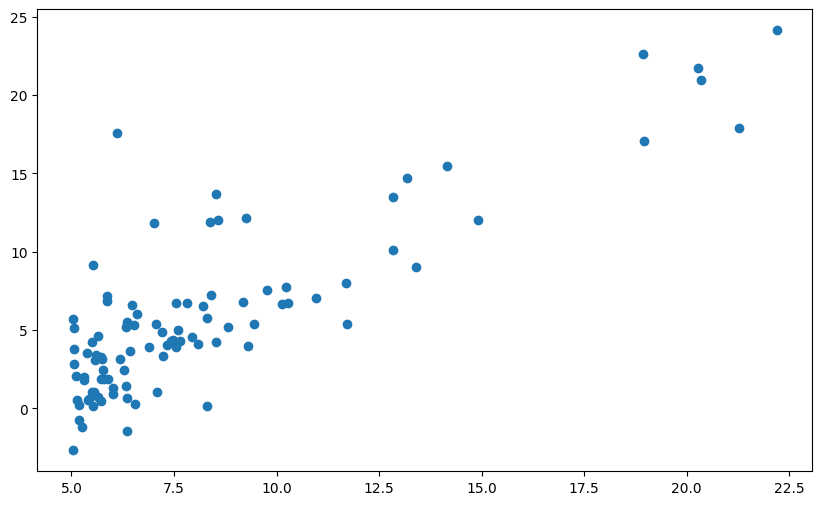

In [163]:
plt.scatter(df.population,df.profit)
plt.show()

Text(0.5, 1.0, 'Scatter plot of training data')

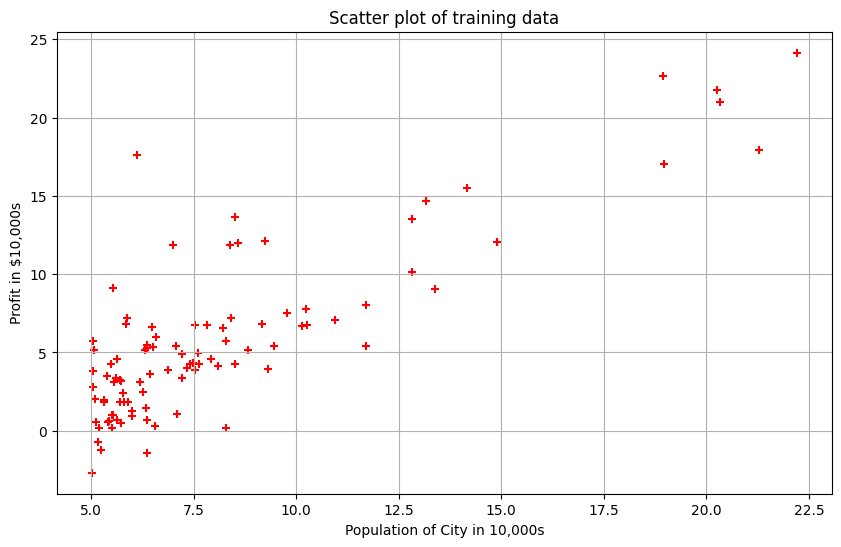

In [164]:
plt.scatter(df.population,df.profit, color='red',marker= '+')
plt.grid()
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')

## Initialization
 To take into account the intercept term , we add an additional first column to df and set it to all ones.

 In the following lines, we add another dimension to our data to accommodate the  intercept term. We also initialize the initial parameters to 0 and the learning rate alpha to 0.01

In [165]:
#Lets create a matrix with a dimension of m by 1. m is the number of observations
m = df.population.size
X_0 = np.ones((m, 1))
X_0 = pd.DataFrame(X_0)
df.insert(0, "intercept",X_0)
display(df)

,intercept,population,profit
0,1.0,6.1101,17.59200
1,1.0,5.5277,9.13020
2,1.0,8.5186,13.66200
3,1.0,7.0032,11.85400
4,1.0,5.8598,6.82330
...,...,...,...
92,1.0,5.8707,7.20290
93,1.0,5.3054,1.98690
94,1.0,8.2934,0.14454
95,1.0,13.3940,9.05510


In [166]:
X = df.loc[:,['intercept','population']]
y = df.profit
theta = np.zeros(2)
iterations = 1500;
alpha = 0.01;

Let's define a function, computeCost, that will compute the cost for a given set of $\theta$ values;

In [167]:
def computeCost(X,y,theta):
  """
  Compute cost for linear regression.
  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent
  m= number of training examples
  n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(1 x m)
  theta : 1D array of fitting parameters or weights. Dimension (1 x n)
  Output Parameters
  -----------------
  J : Scalar value.
  """
  m = len(X)
  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)
  return J


In [168]:
# Lets compute the cost for theta values
print('The cost for given values of theta_0 and theta_1 =',cost )

The cost for given values of theta_0 and theta_1 = 32.072733877455676


Let's define a function, gradientDescent to implement the gradient descent algorithm and optimize the $\theta$ values.

In [169]:
def gradientDescent(X, y, theta, alpha, iterations):
  """
  Compute cost for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(m x 1)
  theta : 1D array of fitting parameters or weights. Dimension (1 x n)
  alpha : Learning rate. Scalar value
  iterations: No of iterations. Scalar value.

  Output Parameters
  -----------------
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)  """
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sum_delta = (alpha / m) * X.transpose().dot(errors);
    theta = theta - sum_delta;
    cost_history[i] = computeCost(X, y, theta)
  return theta, cost_history

## Gradient Descent
We optimize the cost function parameters by calling gradientDescent function. A good way to verify that gradient descent is working correctly is to look at the value of  and check that it is decreasing with each step. We print the cost after every hundred iteration to keep things short.

The cost $J(\theta)$  is parameterized by the vector θ, not X and y. That is, we minimize the value of $J(\theta)$  by changing the values of the vector θ, not by changing X or y. Value of $J(\theta)$  should never increase, and should converge to a steady value by the end of the algorithm.

In [170]:
theta, cost_history = gradientDescent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = intercept    -3.630291
population    1.166362
dtype: float64
cost_history = [6.73719046 5.93159357 5.90115471 ... 4.48343473 4.48341145 4.48338826]


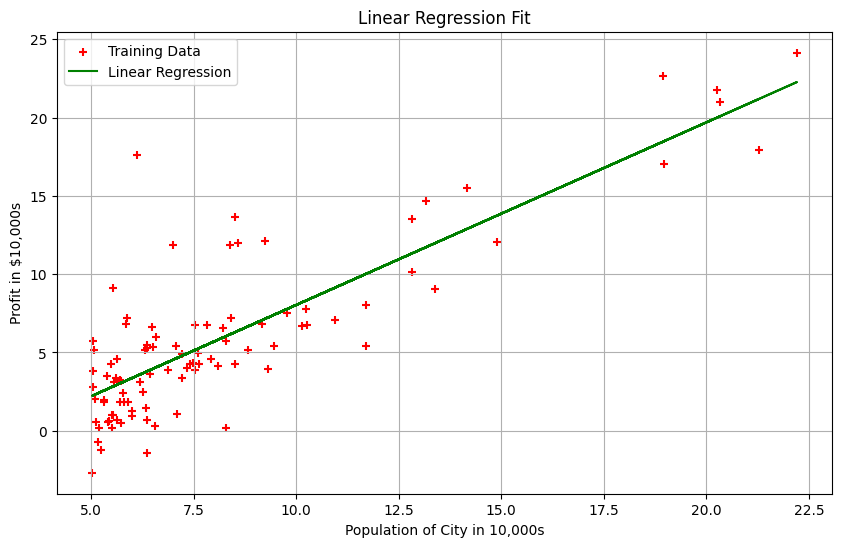

In [174]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X.population, y, color='red', marker= '+', label= 'Training Data')
plt.plot(X.population, X.dot(theta), color='green', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

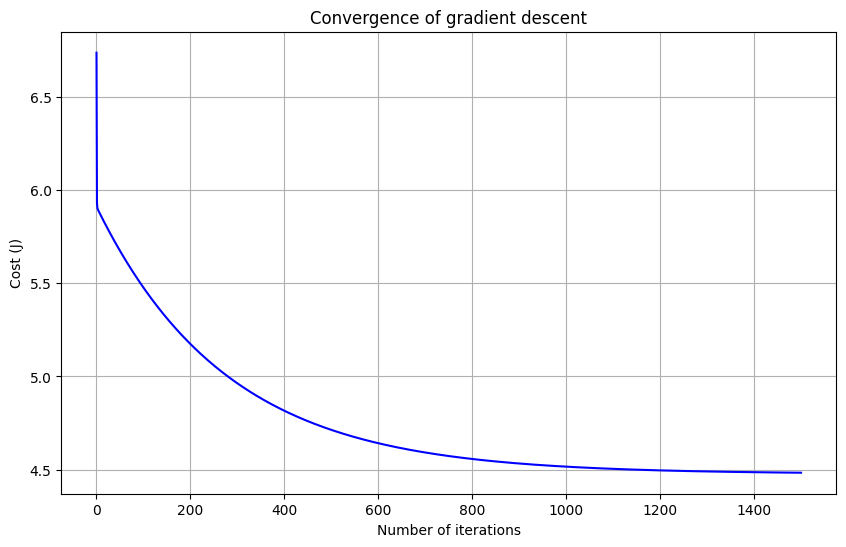

In [172]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')